In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Financial

In [51]:
merged_dems = pd.read_csv('merged_dems.csv')
merged_reps = pd.read_csv('merged_reps.csv')
merged_dems['election_status'] = merged_dems['Primary Status'].replace({'Lost': 0, 'Advanced': 1})
merged_dems['is_dem'] = 1
merged_reps['election_status'] = merged_reps['Primary Status'].replace(
    {'Lost': 0, 'Advanced': 1, 'On the Ballot': 1})
merged_reps['is_dem'] = 0

merged_dems['TTL_RECEIPTS'] = merged_dems['TTL_RECEIPTS'].fillna(0)
merged_reps['TTL_RECEIPTS'] = merged_reps['TTL_RECEIPTS'].fillna(0)

dems_eda = merged_dems[['Candidate', 'election_status', 'is_dem', 'TTL_RECEIPTS']]
reps_eda = merged_reps[['Candidate', 'election_status', 'is_dem', 'TTL_RECEIPTS']]
combined = pd.concat([dems_eda, reps_eda])
combined

,Candidate,election_status,is_dem,TTL_RECEIPTS
0,Lizzetta Hill McConnell,0,1,5127.00
1,Robert Kennedy Jr.,1,1,166845.21
2,Robert Kennedy Jr.,1,1,37129.00
3,Audri Scott Williams,0,1,35365.02
4,Tabitha Isner,1,1,524941.35
...,...,...,...,...
706,Leah Vukmir,1,0,5852699.03
707,Kevin Nicholson,0,0,3893750.00
708,Griffin Jones,0,0,10318.00
709,Charles Barman,0,0,0.00


In [67]:
combined[combined['TTL_RECEIPTS'].astype(int) > 40000000]

,Candidate,election_status,is_dem,TTL_RECEIPTS
167,Rick Scott,1,0,85231716.47


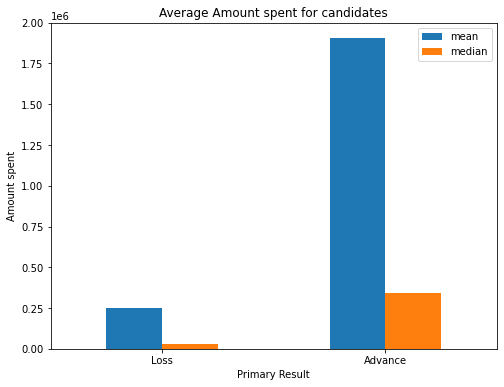

In [57]:
e = combined.groupby(['election_status']).agg(['mean', 'median'])['TTL_RECEIPTS']
e.index = ['Loss', 'Advance']
e.plot.bar(figsize=(8,6))
plt.ylabel('Amount spent')
plt.xlabel('Primary Result')
plt.xticks(rotation=0)

plt.title('Average Amount spent for candidates')
plt.savefig('win_loss_spent')
plt.show()

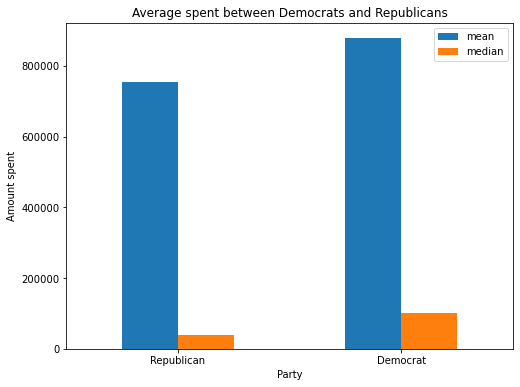

In [58]:
e = combined.groupby(['is_dem']).agg(['mean', 'median'])['TTL_RECEIPTS']
e.index = ['Republican', 'Democrat']
e.plot.bar(figsize=(8,6))
plt.ylabel('Amount spent')
plt.xlabel('Party')
plt.xticks(rotation=0)
plt.title('Average spent between Democrats and Republicans')
plt.savefig('spent_dem_rep')
plt.show()

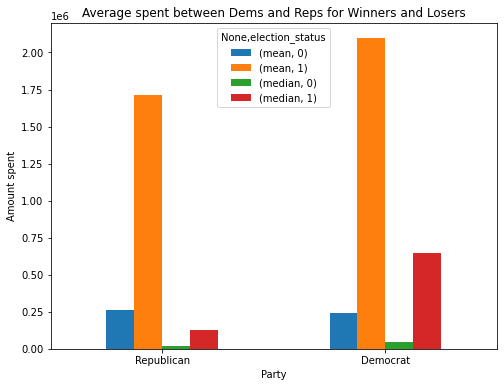

In [60]:
e = combined.groupby(['election_status', 'is_dem']).agg(['mean', 'median']).unstack('election_status')['TTL_RECEIPTS']
e.index = ['Republican', 'Democrat']

x = e.plot.bar(figsize=(8,6))
# x.get_legend().remove()

plt.ylabel('Amount spent')
plt.xlabel('Party')
plt.xticks(rotation=0)
plt.title('Average spent between Dems and Reps for Winners and Losers')
plt.savefig('win_loss_spent_dem_rep')
plt.show()

## Groups

In [117]:
dems = pd.read_csv('dem_candidates.csv')

In [148]:
dems.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?'],
      dtype='object')

In [149]:
endorsement_cols = ['Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?']

dem_endorse = dems[['Candidate', 'State', 'District', 'Won Primary'] + endorsement_cols] \
    .fillna(0).replace({'No': 0, 'Yes': 1})
dem_endorse['total'] = dem_endorse[endorsement_cols].sum(axis=1)
dem_endorse.head()

,Candidate,State,District,Won Primary,Party Support?,Emily Endorsed?,Guns Sense Candidate?,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,total
0,Anthony White (Alabama),AL,Governor of Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Christopher Countryman,AL,Governor of Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,James C. Fields,AL,Governor of Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Sue Bell Cobb,AL,Governor of Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
dem_endorse[dem_endorse['total'] == 6]

,Candidate,State,District,Party Support?,Emily Endorsed?,Guns Sense Candidate?,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?,total
75,Katherine Porter,CA,U.S. House California District 45,1,1,1,0,1,0,1,0,1,0,0,0,0,6


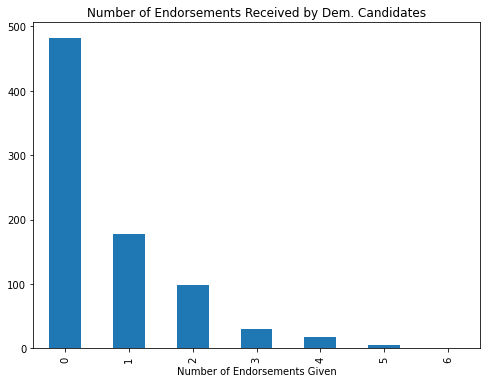

In [138]:
plt.figure(figsize=(8,6))
dem_endorse['total'].value_counts().plot(kind = 'bar')
plt.title('Number of Endorsements Received by Dem. Candidates')
plt.xlabel('Number of Endorsements Given')
plt.savefig('dem_endorse_count')
plt.show()

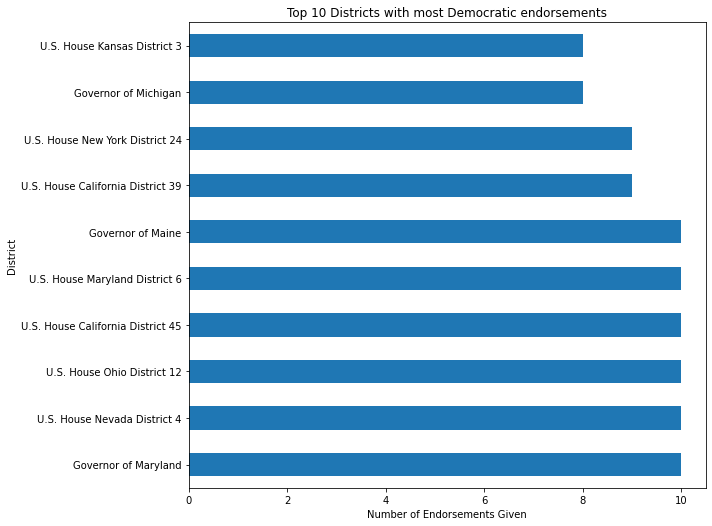

In [162]:
plt.figure(figsize=(10,7))
dem_endorse.groupby('District').agg('sum')['total'] \
    .sort_values(ascending=False)[:10].plot(kind = 'barh')
plt.tight_layout()
plt.title('Top 10 Districts with most Democratic endorsements')
plt.xlabel('Number of Endorsements Given')
# plt.savefig('dem_endorse_dist')
plt.show()

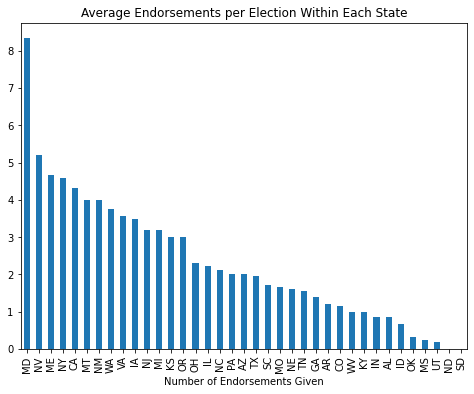

In [140]:
plt.figure(figsize=(8,6))
dem_endorse.groupby(['State', 'District']).agg('sum')['total'].reset_index() \
    .groupby('State').agg('mean')['total'].sort_values(ascending=False).plot(kind = 'bar')

plt.title('Average Endorsements per Election Within Each State')
plt.xlabel('Number of Endorsements Given')
plt.savefig('dem_endorse_state')

plt.show()

## Republicans

In [127]:
reps = pd.read_csv('rep_candidates.csv')
reps.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Primary %', 'Won Primary', 'Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?'],
      dtype='object')

In [129]:
endorsement_cols = ['Rep Party Support?',
       'Trump Endorsed?', 'Bannon Endorsed?', 'Great America Endorsed?',
       'NRA Endorsed?', 'Right to Life Endorsed?',
       'Susan B. Anthony Endorsed?', 'Club for Growth Endorsed?',
       'Koch Support?', 'House Freedom Support?', 'Tea Party Endorsed?',
       'Main Street Endorsed?', 'Chamber Endorsed?', 'No Labels Support?']

rep_endorse = reps[['Candidate', 'State', 'District'] + endorsement_cols].fillna(0).replace({'No': 0, 'Yes': 1})
rep_endorse['total'] = rep_endorse[endorsement_cols].sum(axis=1)
rep_endorse.head()

,Candidate,State,District,Rep Party Support?,Trump Endorsed?,Bannon Endorsed?,Great America Endorsed?,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?,total
0,Mike Dunleavy,AK,Governor of Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Michael Sheldon,AK,Governor of Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mead Treadwell,AK,Governor of Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Darin Colbry,AK,Governor of Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Thomas Gordon,AK,Governor of Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
rep_endorse[rep_endorse['total'] == 6]

,Candidate,State,District,Rep Party Support?,Trump Endorsed?,Bannon Endorsed?,Great America Endorsed?,NRA Endorsed?,Right to Life Endorsed?,Susan B. Anthony Endorsed?,Club for Growth Endorsed?,Koch Support?,House Freedom Support?,Tea Party Endorsed?,Main Street Endorsed?,Chamber Endorsed?,No Labels Support?,total
374,Josh Hawley,MO,U.S. Senate Missouri,0,1,1,1,0,1,0,1,1,0,0,0,0,0,6
633,Marsha Blackburn,TN,U.S. Senate Tennessee,0,1,1,1,0,0,1,1,1,0,0,0,0,0,6


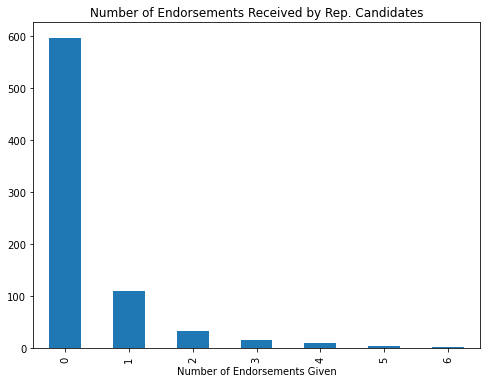

In [141]:
plt.figure(figsize=(8,6))
rep_endorse['total'].value_counts().plot(kind = 'bar')
plt.title('Number of Endorsements Received by Rep. Candidates')
plt.xlabel('Number of Endorsements Given')
plt.savefig('rep_endorse_count')
plt.show()

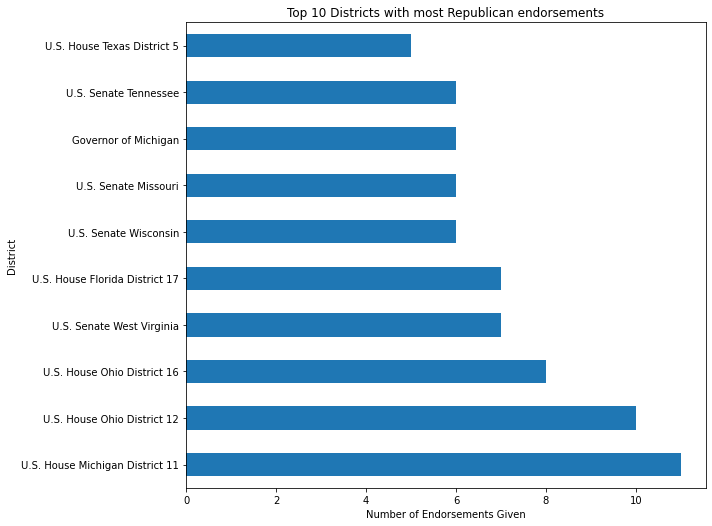

In [161]:
plt.figure(figsize=(10,7))
rep_endorse.groupby('District').agg('sum')['total'] \
    .sort_values(ascending=False)[:10].plot(kind = 'barh')
plt.tight_layout()

plt.title('Top 10 Districts with most Republican endorsements')
plt.xlabel('Number of Endorsements Given')
# plt.savefig('rep_endorse_dist')
plt.show()

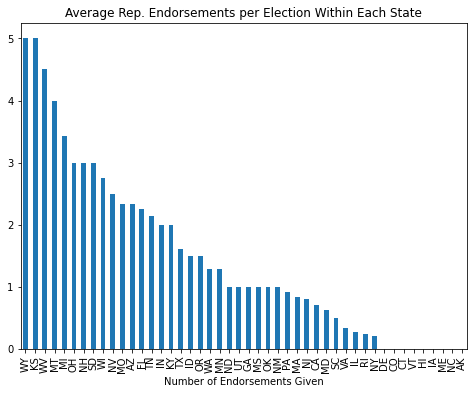

In [143]:
plt.figure(figsize=(8,6))
rep_endorse.groupby(['State', 'District']).agg('sum')['total'].reset_index() \
    .groupby('State').agg('mean')['total'].sort_values(ascending=False).plot(kind = 'bar')

plt.title('Average Rep. Endorsements per Election Within Each State')
plt.xlabel('Number of Endorsements Given')
plt.savefig('rep_endorse_state')
plt.show()